# PENGUINS DATASET

### 1. Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

### 2. Load Dataset

In [5]:
df = sns.load_dataset('penguins')

# Display first few rows
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 3. Explore Data

In [6]:
print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

Shape of dataset: (344, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Missing Values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Summary Statistics:
        species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.0000

## Insights:
### Dataset contains details about penguin species, island, and body measurements.
### Some missing values exist in 'sex' and 'bill_length_mm' etc.


### 4. Data Cleaning

In [7]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)


Duplicate rows: 0


C:\Users\Sreeja Reddy\AppData\Local\Temp\ipykernel_21212\1953618251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


## Insights:
### Duplicates removed and missing values handled.

### 5. Analysis with NumPy & Pandas

In [8]:
mean_values = df.mean(numeric_only=True)
print("Average values of features:\n", mean_values)

avg_flipper = df.groupby('species')['flipper_length_mm'].mean()
print("\nAverage Flipper Length by Species:\n", avg_flipper)

avg_mass = df.groupby('species')['body_mass_g'].mean()
print("\nAverage Body Mass by Species:\n", avg_mass)


Average values of features:
 bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

Average Flipper Length by Species:
 species
Adelie       190.025758
Chinstrap    195.823529
Gentoo       217.055768
Name: flipper_length_mm, dtype: float64

Average Body Mass by Species:
 species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5068.965761
Name: body_mass_g, dtype: float64


## Insights:
### Gentoo penguins are largest on average.
### Adelie are smallest.

### 6. Visualizations

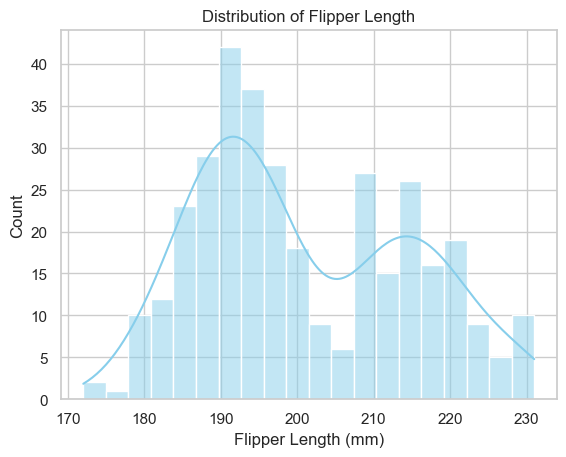

C:\Users\Sreeja Reddy\AppData\Local\Temp\ipykernel_21212\655190623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=df, palette='Set2')


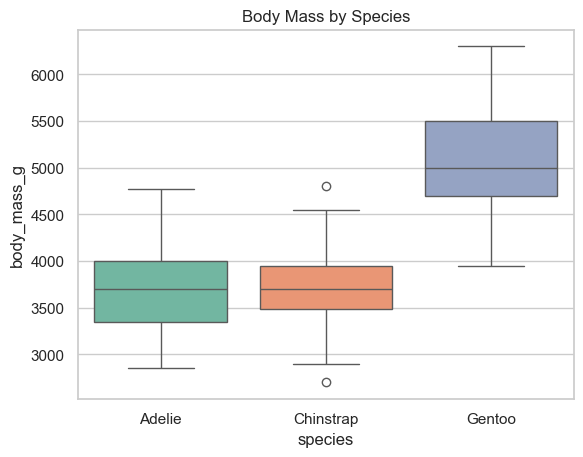

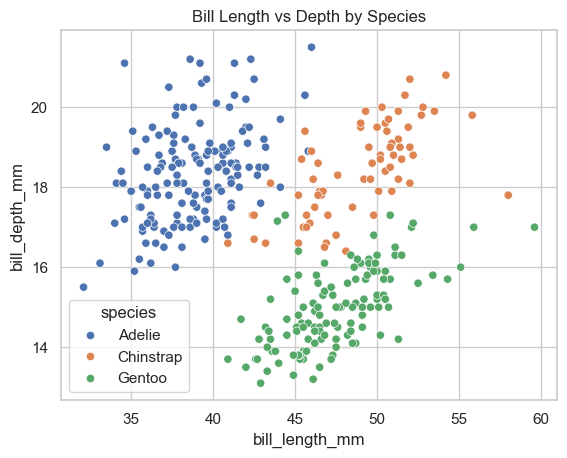

In [11]:
sns.histplot(df['flipper_length_mm'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.show()

sns.boxplot(x='species', y='body_mass_g', data=df, palette='Set2')
plt.title("Body Mass by Species")
plt.show()

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title("Bill Length vs Depth by Species")
plt.show()

## Insights:
### Each species forms distinct clusters — great for classification.
### Gentoo species tend to have longer flippers and larger body mass.